<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/BAM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class BAM(object):
    def __init__(self, data):
        self.pairs = data
        m1 = len(self.pairs[0][1])
        m2 = len(self.pairs[0][0])
        # create weight matrix
        self.W = np.zeros((m2,m1))
        for p in self.pairs:
          X = p[0]
          Y = p[1]
          self.W += np.outer(X, Y)

    def get_assoc(self, A):
        A = np.asarray(A)
        y=np.dot(A.T,self.W)
        y[y<0]=-1
        y[y>=0]=1
        return y

  




[-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1] --->  [-1. -1.  1.] /[-1, -1, -1]
[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1] --->  [-1. -1.  1.] /[-1, -1, 1]
[-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
Accuracy = 20


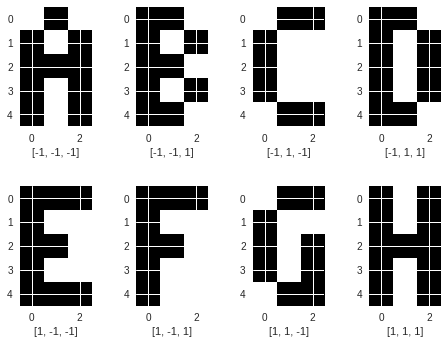

In [5]:
import numpy as np

A = [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tA = [-1, -1,-1] 
B = [1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1]
tB = [-1, -1, 1]
C = [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
tC = [-1,1,-1] 
D = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1]
tD = [-1,1,1]
E = [1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]
tE = [1,-1,-1]
F =[1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1]
tF = [1, -1, 1]
G = [-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1]
tG = [1, 1, -1]
H = [1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tH = [1, 1, 1]

X =[A,B,C,D,E,F,G,H]
Y = [tA,tB,tC,tD,tE,tF,tG,tH]


p_num = len(X)
pairs = []
for i in range (p_num):
  pairs.append([X[i], Y[i]])
  

bam = BAM(pairs)
print('\n')
print(f'{A} ---> ', bam.get_assoc(A), f'/{tA}')
print(f'{B} ---> ', bam.get_assoc(B), f'/{tB}')
    
import matplotlib.pyplot as plt

def draw_img(ax, X):
  ax.imshow(np.reshape(X,[5,3]))

fig, axes = plt.subplots(2, 4)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for i in range(4):
  draw_img(axes[0,i], X[i])
  xlabel = Y[i]; axes[0,i].set_xlabel(xlabel)
  draw_img(axes[1,i], X[i+4]) 
  xlabel = Y[i+4]; axes[1,i].set_xlabel(xlabel)

  
import random
def test_noise (inp, te_n, n_n): #inp:input vector te_n: number of noisy samples for test. n_n: number of noisy elements
  test = []
  for i in range(te_n):
    rnd = random.sample(range(len(inp)), n_n)
    noise = np.asarray(inp)
    for i in rnd:
      noise[i] = 0
    test.append(noise)
    
  test=np.asarray(test)
  test = np.unique(test,axis=0)
 
  return test

print(A)
test_data=test_noise(A, 1000, 2)
success = 0
for i,noisy_data in enumerate(test_data):
  predicted = bam.get_assoc(noisy_data)
  if np.array_equal(tA, predicted):
    success +=1

print(f"Accuracy = {success}")


    
